In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append('../src/')
import visualizations as vis
import brownbag as b

%load_ext autoreload
%autoreload 2

In [2]:
# projects we've already done data production for -- 11 remote, 6 field
remote_done = [
'CAM_22_FAP',
'LBR_22_SCNL',
'MDG_22_DWCT',
'MLW_22_WFZ',
'RWA_22_ARCOS',
'RWA_22_ICRAF',
'RWA_22_BIRDLIFE',
'SLE_22_YARDO',
'TAZ_22_SJT',
'TGO_22_MAPTO',
'TGO_22_PERJAT',
]#11

field_done = [
'GHA_22_INEC',
'GHA_22_PADO',
'KEN_22_GREENPOT',
'GHA_22_ECOCARE',
'GHA_22_GGV',
'KEN_22_DNRC',
] #6

mangrove_done = [
'GHA_22_FOTE',
'MOZ_22_ISTITUTO',
'TAZ_22_FT',
'GHA_22_HMPOANO',
] #4

review_req = [
    "TGO_PADES",
    "SLE_22_EFA",
    "NIG_22_ARAMD",
    "KEN_22_FT",
    "GIN_22_AMSPM",
    "DRC_22_PWP",
    "BUR_22_PWP",
    "MLI_22_SAHELECO"
]

remote_upcoming = ['CAR_22_EEDD', 
                   'KEN_22_DREK', 
                   'RWA_22_SE', 
                   'UGA_22_SWAGEN', 
                   'UGA_22_PANR', 
                   'NIG_22_NCF', 
                   'ETH_22_WVE', 
                   'ETH_22_SUNARMA', 
                   'RWA_22_RECOR', 
                   'CIV_22_SOSFORETS', 
                   'KEN_22_KENVO', 
                   'NIG_22_IITA', 
                   'TGO_22_ADHD'] #13


## Notes on Findings

Experiments
- shifting the canopy cover threshold from 40% to 60% had the impact of moving 19 polygons from weak to strong remote, but insignificant in shifting proportion allocated to field.

Other updates / findings
- 13 projects contain multiple practices in a single polygon. 4 projects updated where a single row contains a multi-practice entry. Some projects are all multi-practice, so no clear solution.
- EV will use baseline canopy if 2 yr mark has passed (TTC not yet run for EV).
  
In what scenarios will the decision tree be unable to provide a result?
- If more than one practice is being used (i.e. `assisted-natural-regeneration,tree-planting`)
- 228 are flagged with `review required`. This is due to having multiple `practice` values assigned to a single polygon (159 polygons) or missing canopy cover at baseline (69 polygons).
  

In [27]:
df1 = pd.read_csv("../data/results/dtree_output_c1_07-14-2025_exp1.csv")
df2 = pd.read_csv("../data/results/dtree_output_c1_07-14-2025_exp2.csv")

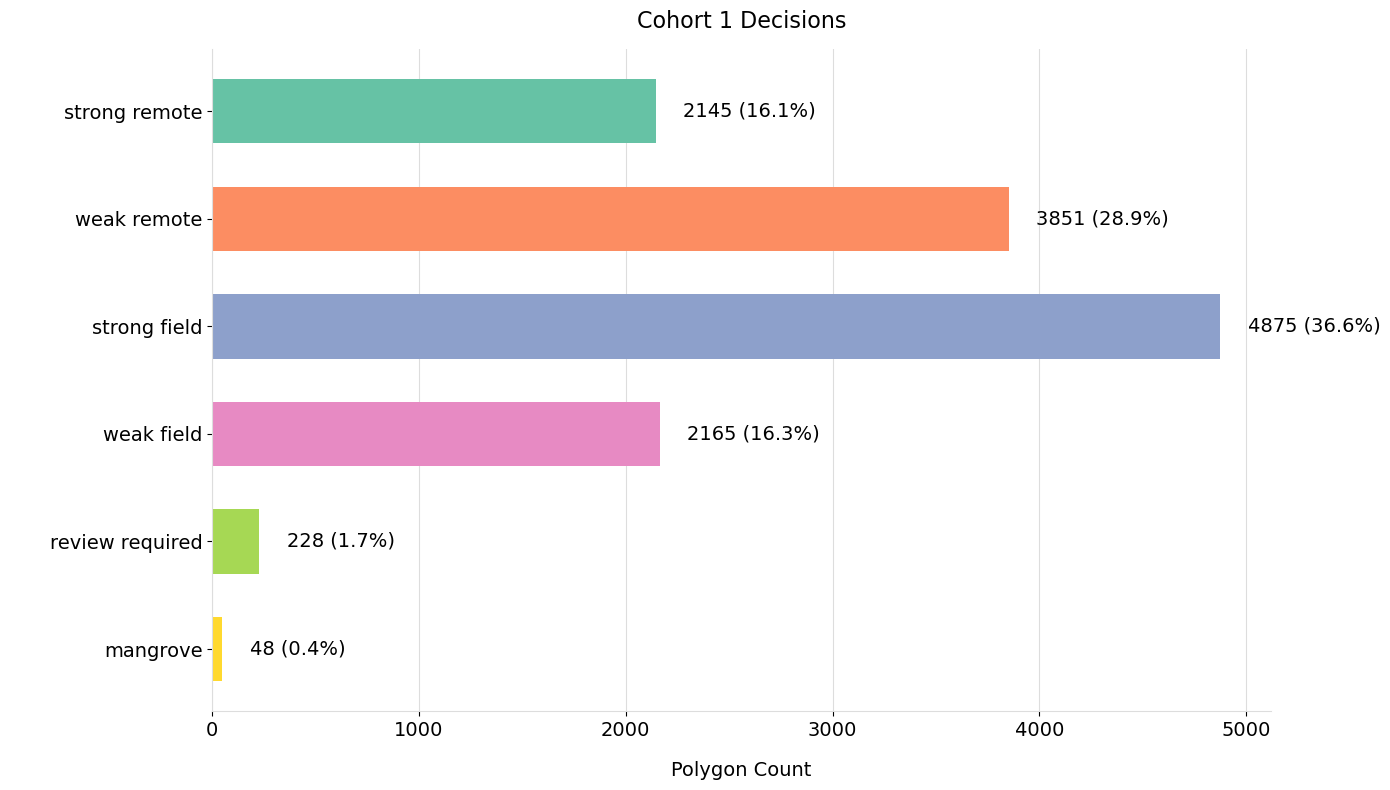

In [5]:
vis.portfolio_breakdown(df1, title="Cohort 1 Decisions")

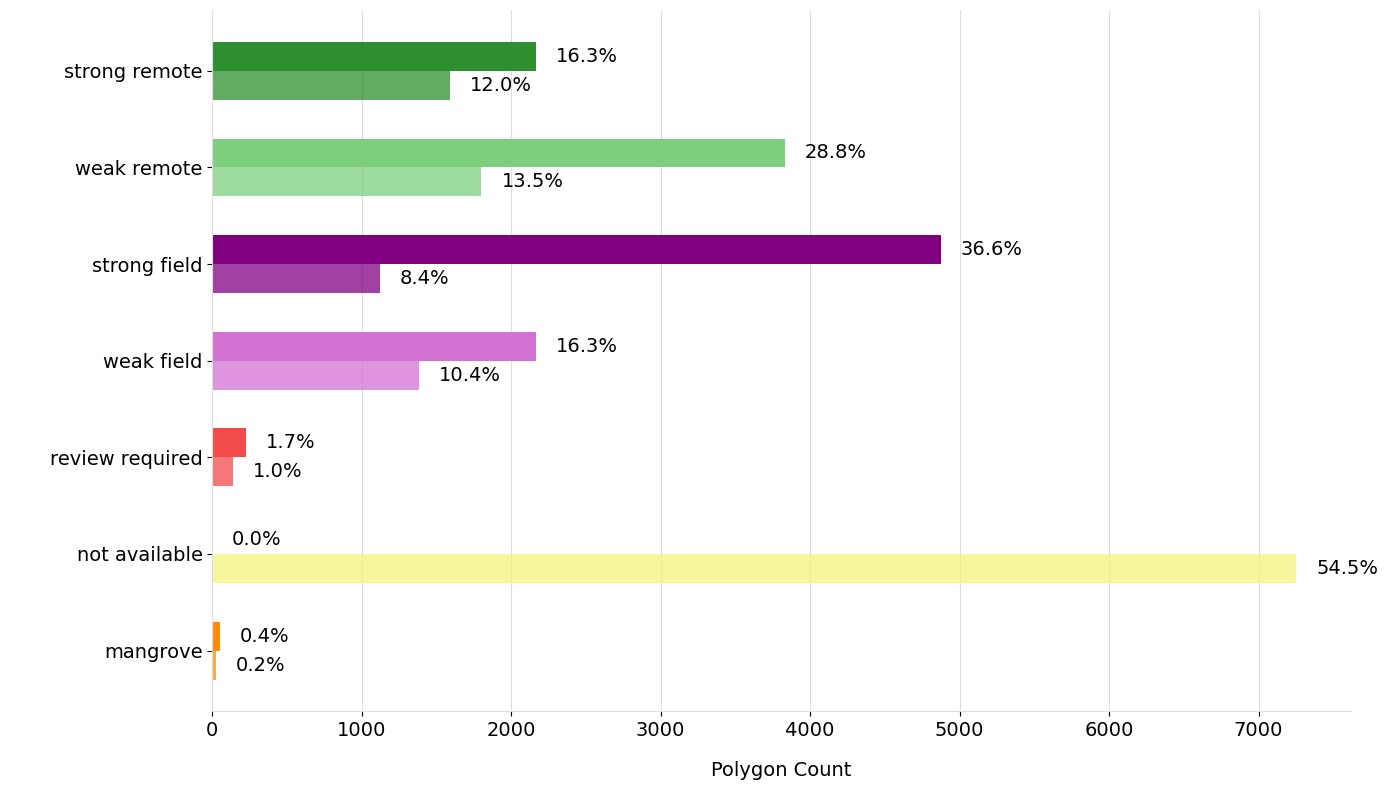

In [26]:
vis.NEW_portfolio_breakdown(df)

In [80]:
done = set(remote_done) | set(field_done) | set(mangrove_done)
c1_remain = df[~df['project_name'].isin(done)]
print(len(done), len(c1_remain.project_name.unique()))

21 61


In [89]:
# Remaining field verification requirements for Cohort 1
remove = set(remote_done) | set(field_done) | set(mangrove_done) | set(remote_upcoming)
c1_field = df[~df['project_name'].isin(remove)]

In [91]:
len(c1_field.project_name.unique())

48

## Remote Upcoming
- For the polygons that are not strong remote, does anything indicate we need to adjust the criteria?

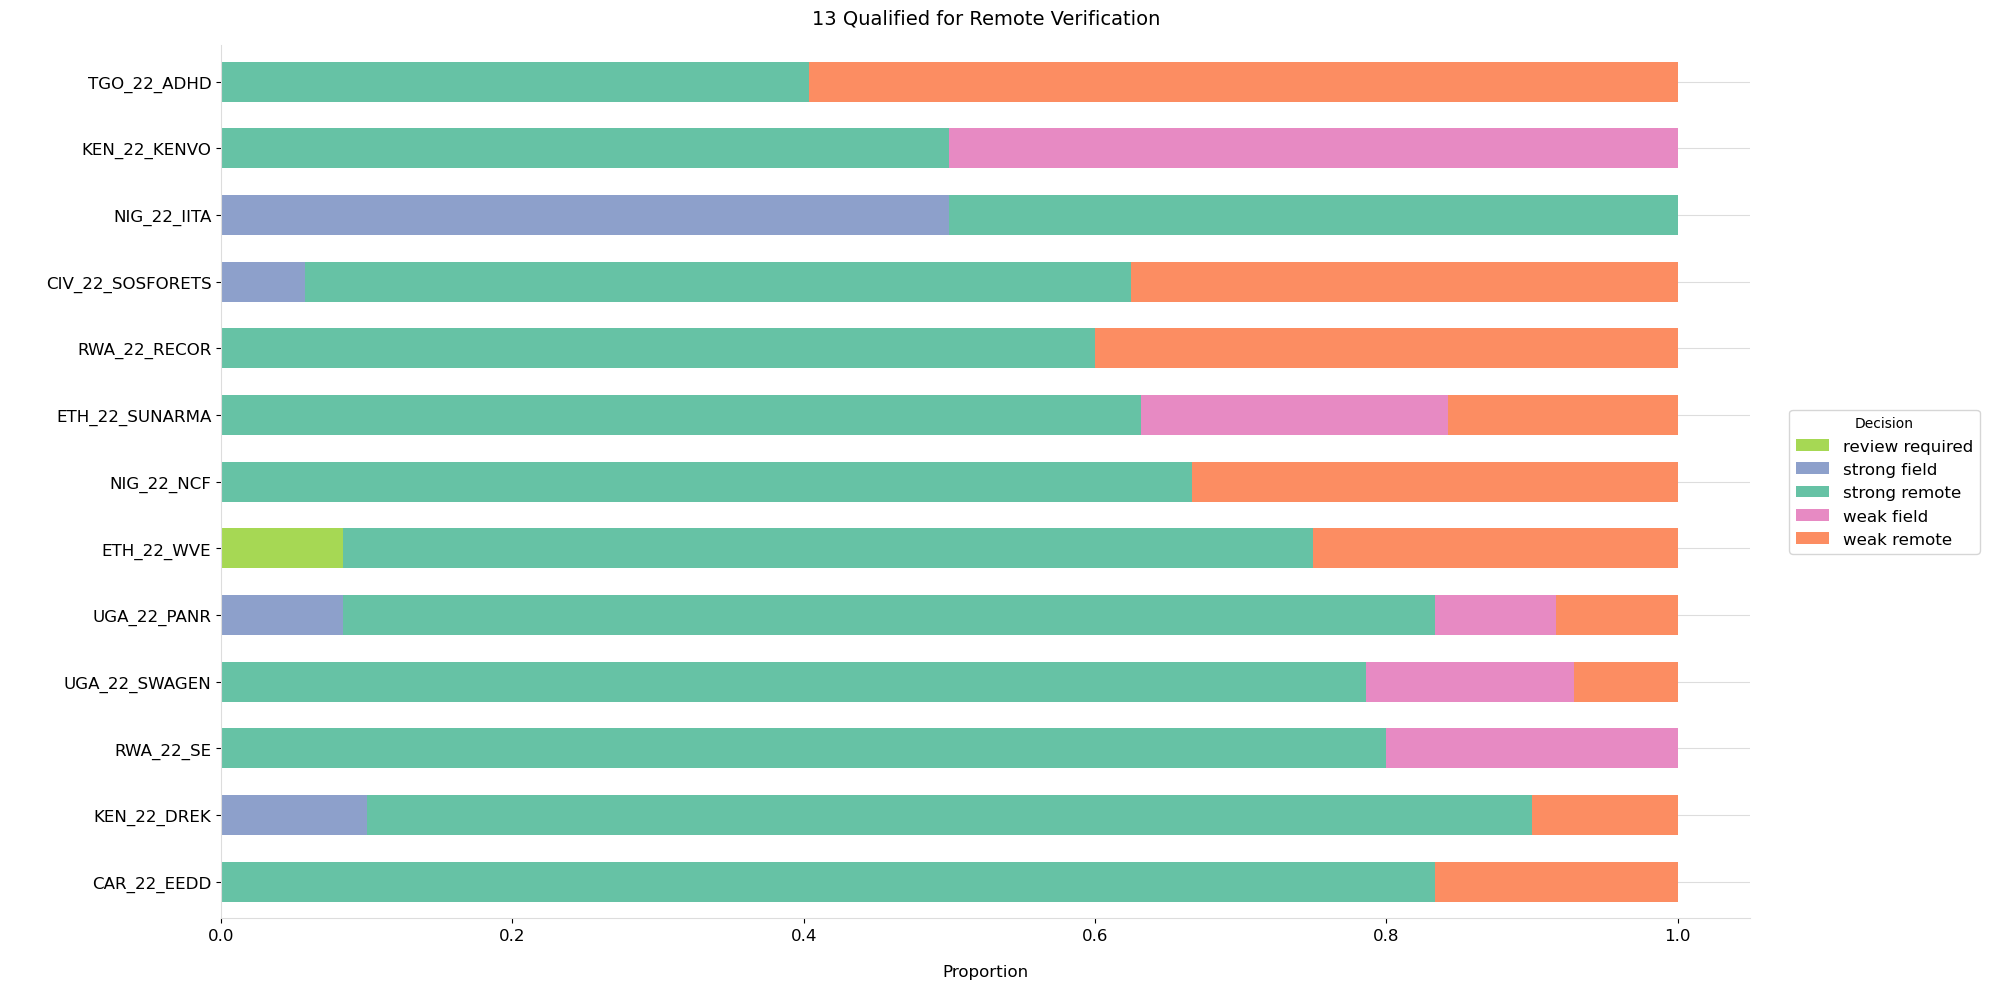

In [15]:
rm = df[df['project_name'].isin(remote_upcoming)]
vis.plot_decision_proportions(rm, sort_by='strong remote', title = '13 Qualified for Remote Verification')

## Compare baseline & EV decisions

In [85]:
df4 = pd.read_csv("../data/results/dtree_output_c1_07-14-2025_exp4.csv")

review = set(mangrove_done) | set(review_req)
done = set(remote_done) | set(field_done) | set(mangrove_done) | set(review_req)
field = set(field_done)
remote = set(remote_done)
c1_field = df4[df4['project_name'].isin(field)]
c1_remote = df4[df4['project_name'].isin(remote)]
c1_remaining = df4[~df4['project_name'].isin(done)]
c1_review = df4[df4['project_name'].isin(review)]

In [62]:
print(len(c1_remaining.project_name.unique()))

53


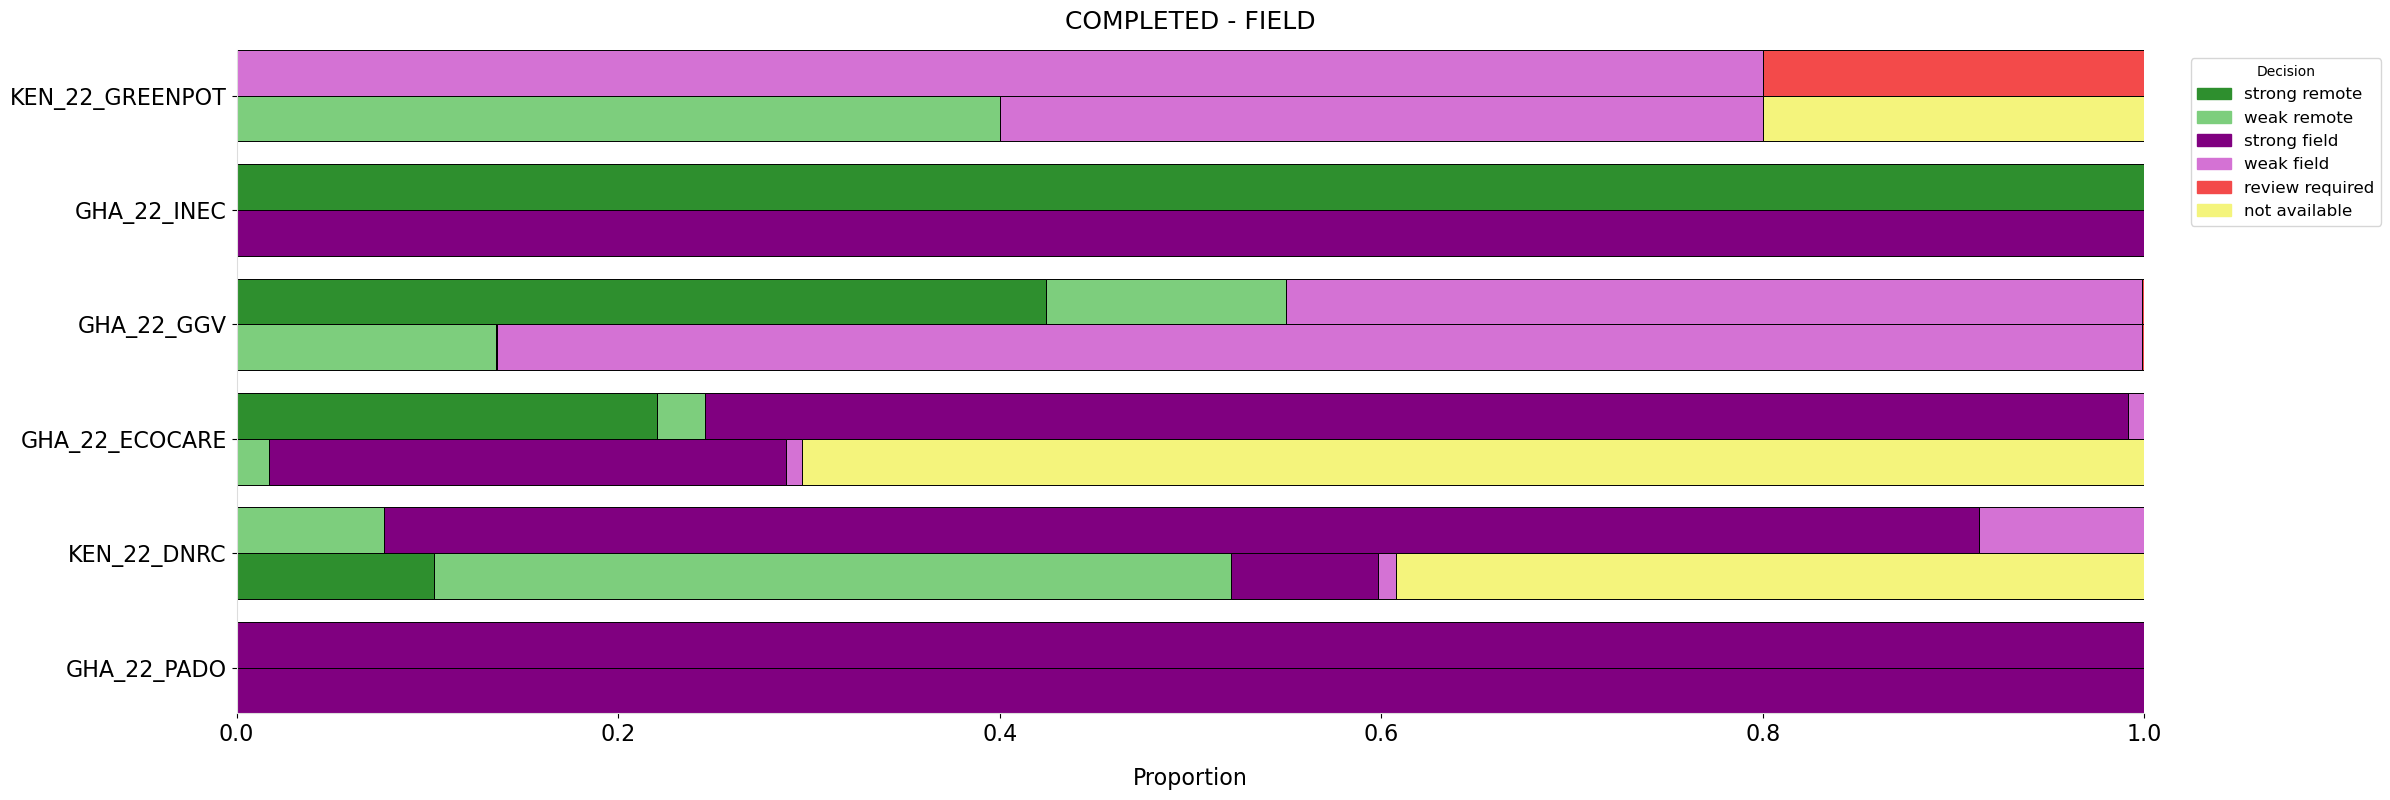

In [17]:
vis.plot_decision_proportions(
    c1_field,
    sort_by="strong field",      
    group_height=0.8,
    figsize=(24, len(df4.project_id.unique()) * 0.1),
    title="COMPLETED - FIELD",
)

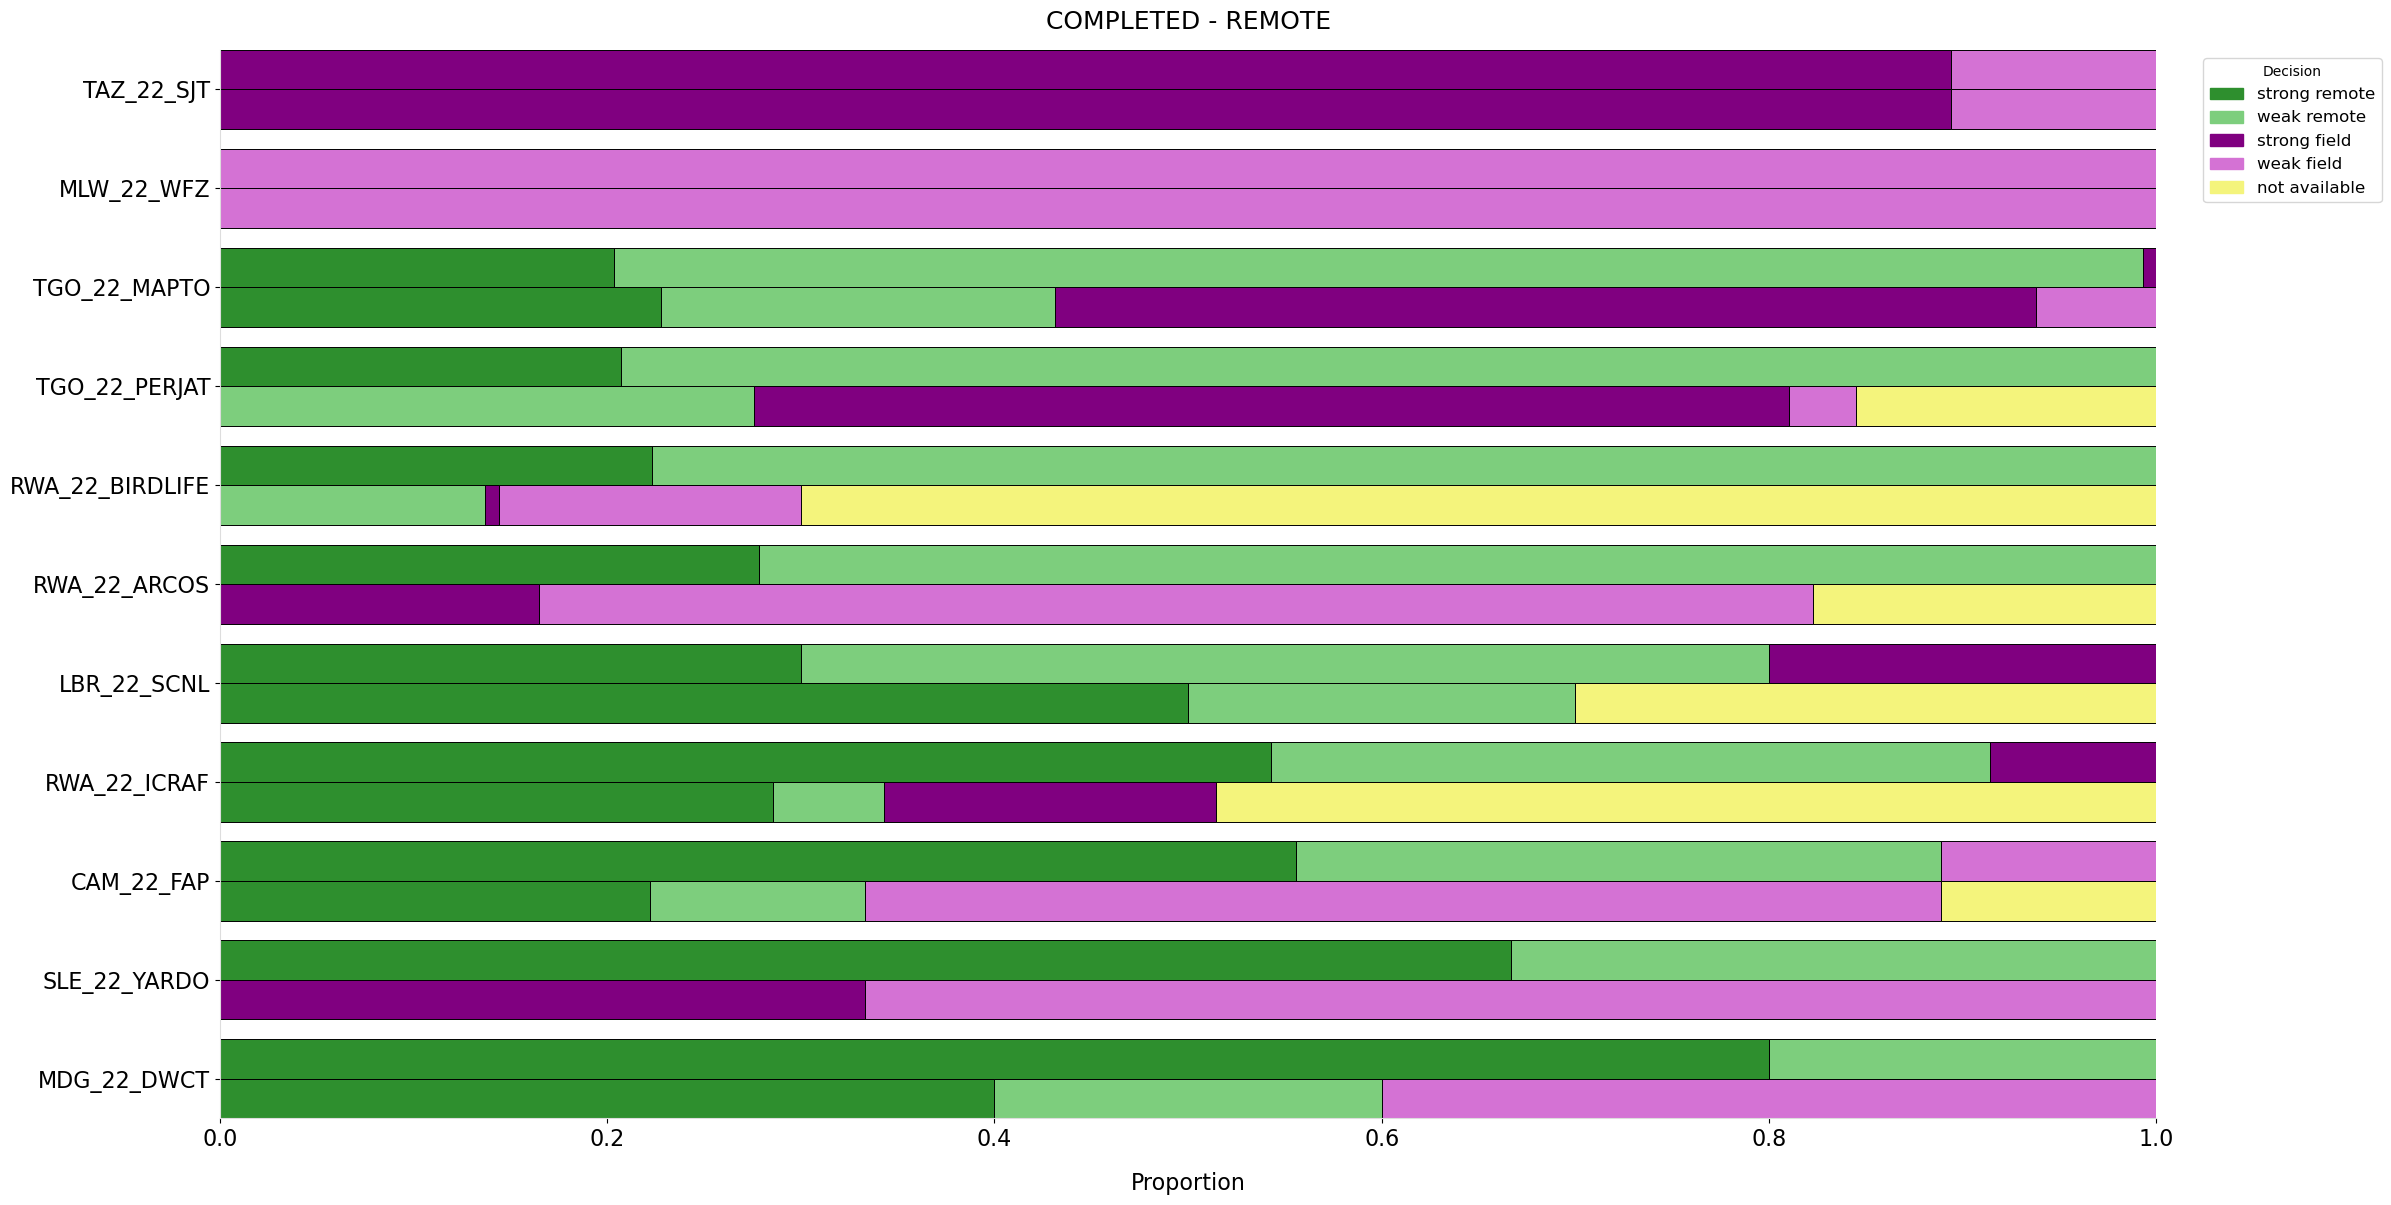

In [78]:
vis.plot_decision_proportions(
    c1_remote,
    sort_by=["strong remote"],      
    group_height=0.8,
    figsize=(24, len(df4.project_id.unique()) * 0.15),
    title="COMPLETED - REMOTE",
)

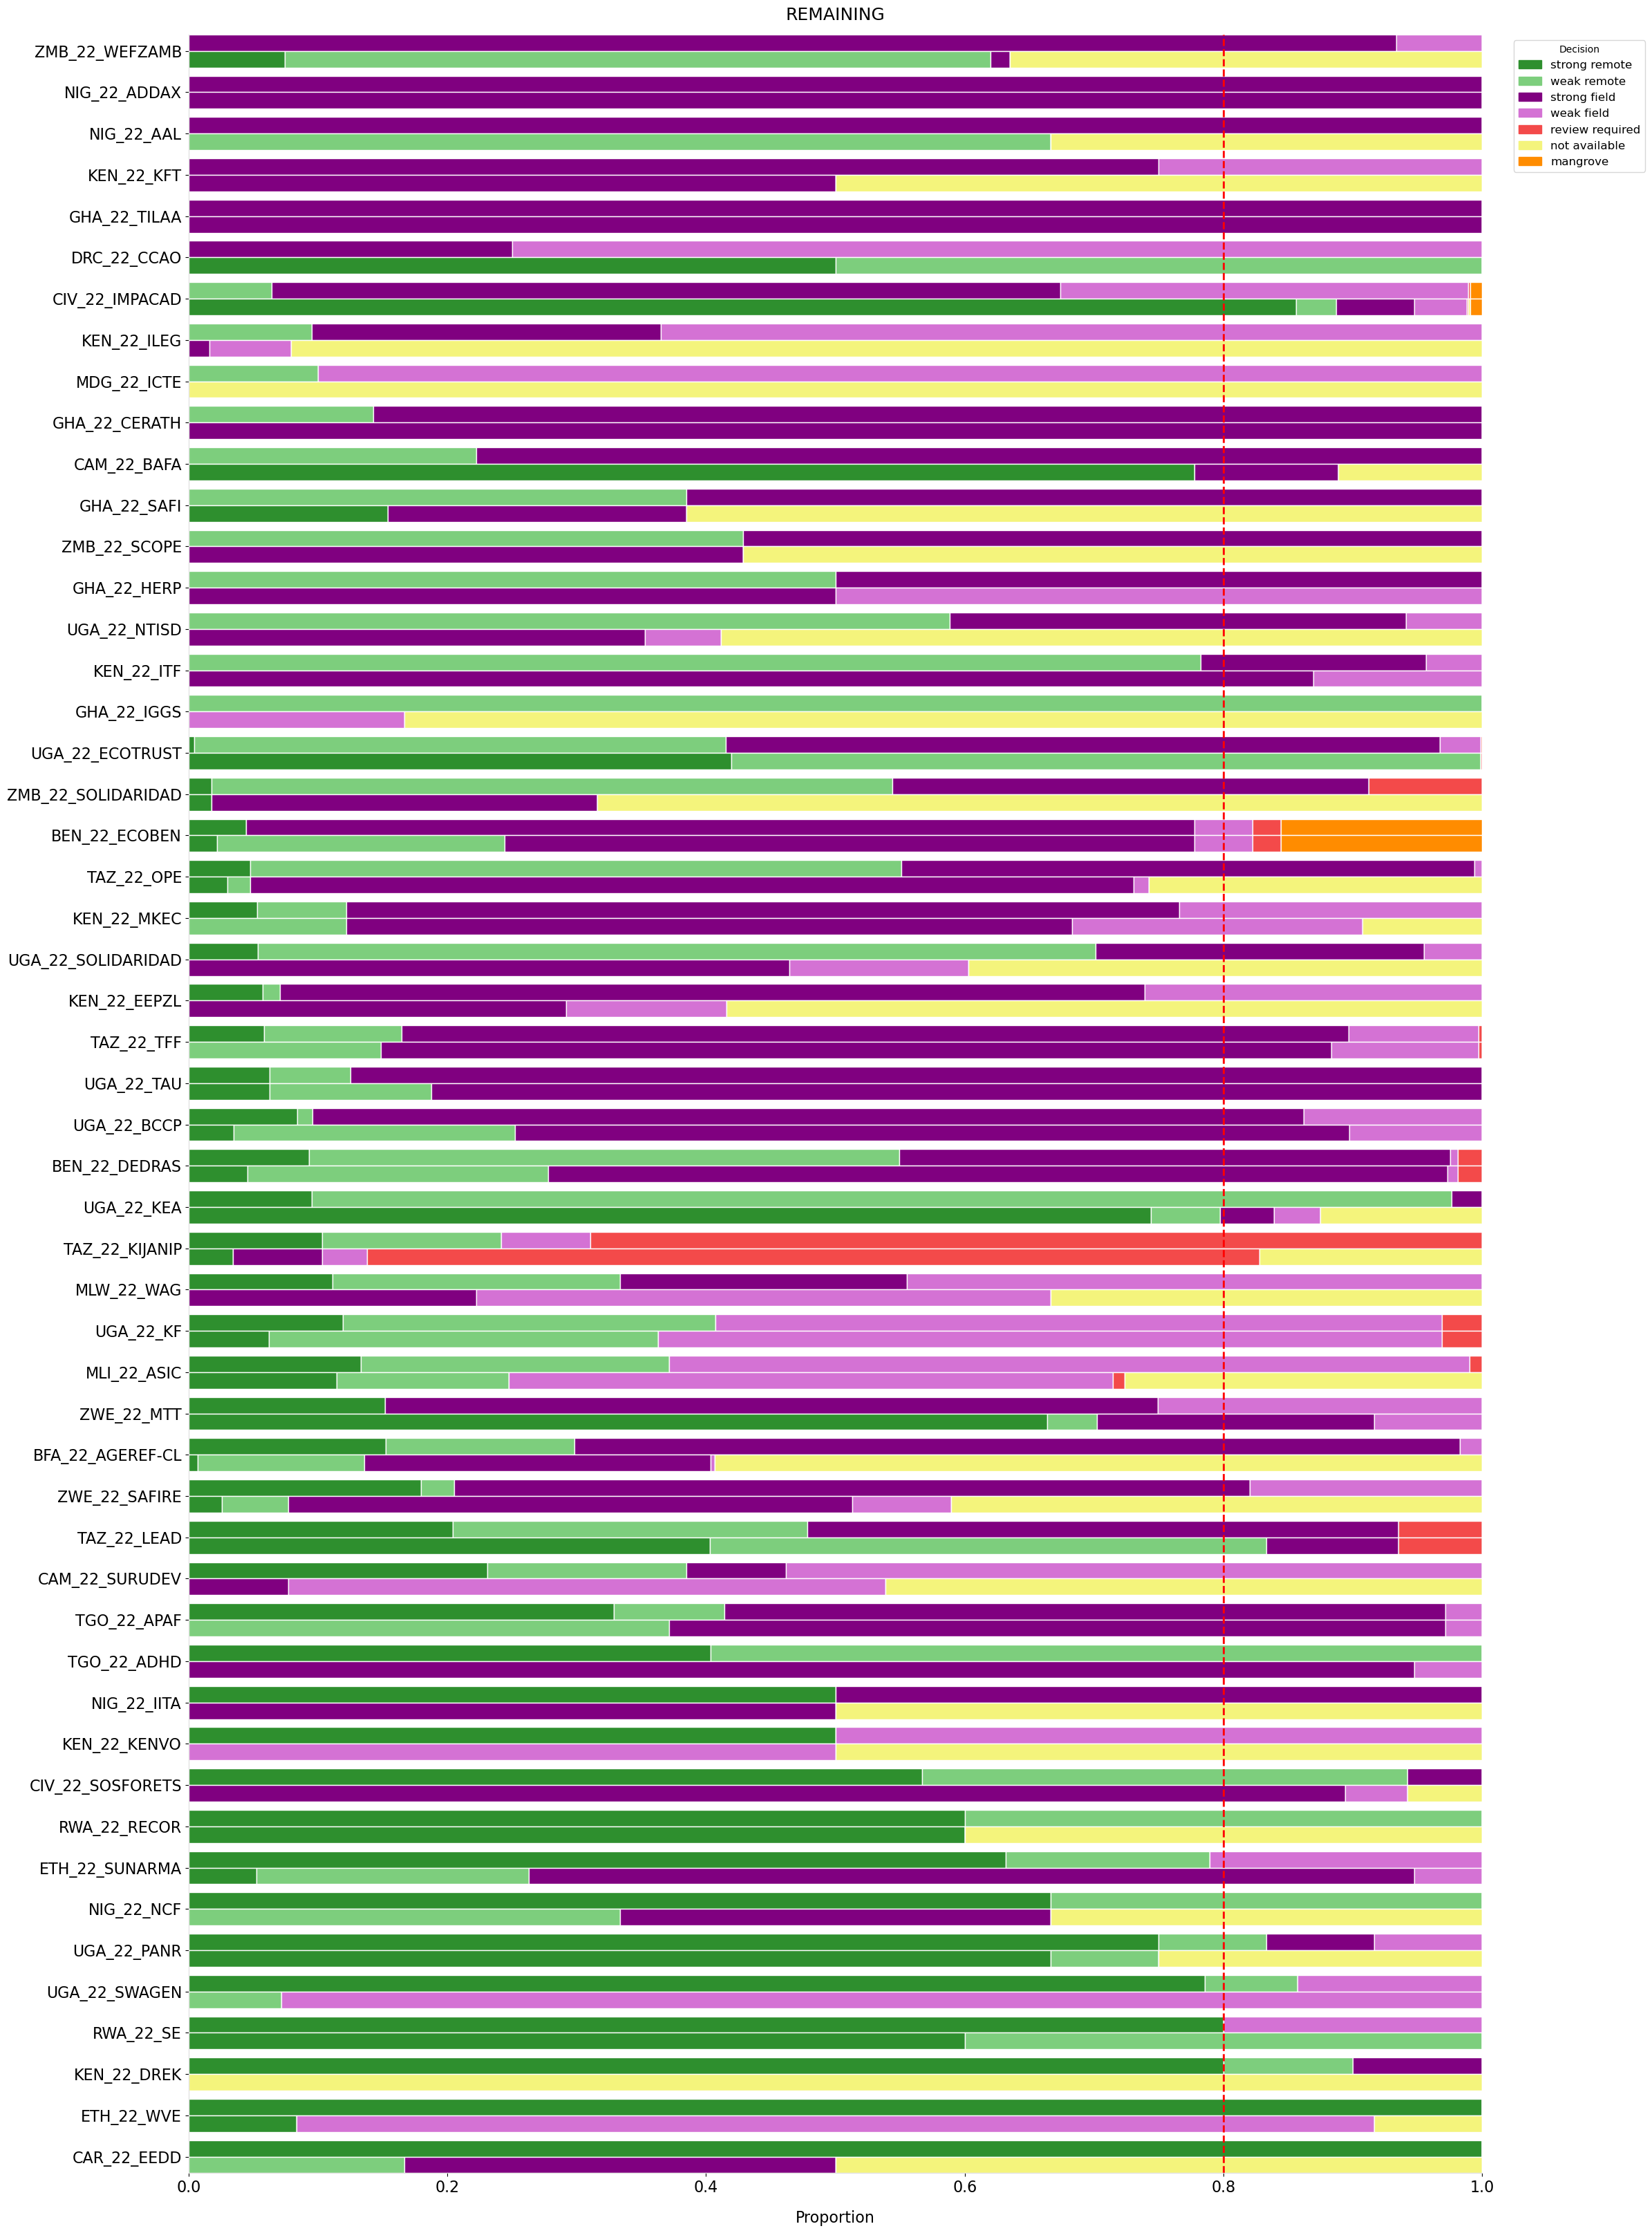

In [29]:
vis.plot_decision_proportions(
    c1_remaining,
    sort_by=["strong remote", "weak remote"],      
    group_height=0.8,
    figsize=(24, len(df4.project_id.unique()) * 0.4),
    title="REMAINING",
    threshold=0.8,
)

# Check results

In [8]:
## resolve practice

df1.practice.value_counts()

practice
tree-planting                                                 11973
direct-seeding                                                  927
assisted-natural-regeneration                                   281
assisted-natural-regeneration,tree-planting                      79
assisted-natural-regeneration,direct-seeding,tree-planting       42
direct-seeding,tree-planting                                      5
assisted-natural-regeneration,direct-seeding                      5
Name: count, dtype: int64

In [17]:
multi_practice_df = df1[df1['practice'].str.contains(',')]
multi_practice_df.decision.value_counts()

decision
review required    120
mangrove            11
Name: count, dtype: int64

In [18]:
multi_practice_df.project_name.value_counts()

project_name
MLI_22_SAHELECO       41
BUR_22_PWP            30
TGO_PADES             17
DRC_22_PWP             9
SLE_22_EFA             8
MOZ_22_ISTITUTO        7
NIG_22_ARAMD           6
ZMB_22_SOLIDARIDAD     5
GHA_22_HMPOANO         4
CAM_22_SURUDEV         1
MLI_22_ASIC            1
GHA_22_SAFI            1
ETH_22_WVE             1
Name: count, dtype: int64

In [23]:
len(multi_practice_df.project_name.unique())

13

In [26]:
prj = df1[df1.project_name == 'DRC_22_PWP']
prj
#prj.to_csv('../data/surudev.csv')

,project_id,poly_id,site_id,project_name,plantstart,practice,target_sys,baseline_year,ttc_2020,ttc_2021,ttc_2022,ttc_2023,ttc_2024,baseline_img_count,ev_img_count,baseline_canopy,ev_canopy,slope_area,slope,decision
10526,1e207d56-d0ed-4b4f-b1d9-94aa8aafb71f,b5b0ae19-29ae-4373-b8df-bd0cef7dddc5,7357006e-cfed-4a79-886e-2bf6fc74beff,DRC_22_PWP,2022-09-01,"assisted-natural-regeneration,tree-planting",agroforest,2022,NaN,23.0,NaN,NaN,NaN,0.0,0.0,open,investigate,94.0,steep,review required
10527,1e207d56-d0ed-4b4f-b1d9-94aa8aafb71f,186054f6-f4ca-4f4b-99e7-363accff2e3a,7357006e-cfed-4a79-886e-2bf6fc74beff,DRC_22_PWP,2022-09-01,"assisted-natural-regeneration,tree-planting",agroforest,2022,NaN,0.0,NaN,NaN,NaN,0.0,1.0,open,investigate,61.7,steep,review required
10528,1e207d56-d0ed-4b4f-b1d9-94aa8aafb71f,cc98be44-a7ec-4933-a770-4d2b5b5a8c4a,7357006e-cfed-4a79-886e-2bf6fc74beff,DRC_22_PWP,2022-09-01,"assisted-natural-regeneration,tree-planting",agroforest,2022,NaN,0.0,NaN,NaN,NaN,0.0,0.0,open,investigate,91.2,steep,review required
10529,1e207d56-d0ed-4b4f-b1d9-94aa8aafb71f,1387f066-3b29-4b52-a080-9acdd3c614f0,7357006e-cfed-4a79-886e-2bf6fc74beff,DRC_22_PWP,2022-09-01,"assisted-natural-regeneration,tree-planting",agroforest,2022,NaN,0.0,NaN,NaN,NaN,0.0,1.0,open,investigate,47.5,steep,review required
10530,1e207d56-d0ed-4b4f-b1d9-94aa8aafb71f,334da271-5a73-4c12-b94c-45fccb9c2752,7357006e-cfed-4a79-886e-2bf6fc74beff,DRC_22_PWP,2022-09-01,"assisted-natural-regeneration,tree-planting",agroforest,2022,NaN,0.0,NaN,NaN,NaN,0.0,0.0,open,investigate,92.7,steep,review required
10531,1e207d56-d0ed-4b4f-b1d9-94aa8aafb71f,c62111ae-a302-455f-bd71-19954b8fc31f,7357006e-cfed-4a79-886e-2bf6fc74beff,DRC_22_PWP,2022-09-01,"assisted-natural-regeneration,tree-planting",agroforest,2022,NaN,0.0,NaN,NaN,NaN,0.0,1.0,open,investigate,84.6,steep,review required
10532,1e207d56-d0ed-4b4f-b1d9-94aa8aafb71f,ee730be2-1af7-48e4-9ad9-fda260efa13f,7357006e-cfed-4a79-886e-2bf6fc74beff,DRC_22_PWP,2022-09-01,"assisted-natural-regeneration,tree-planting",agroforest,2022,NaN,0.0,NaN,NaN,NaN,0.0,1.0,open,investigate,91.1,steep,review required
10533,1e207d56-d0ed-4b4f-b1d9-94aa8aafb71f,c2fd4b04-f60f-412c-bc9b-15698f9c3252,7357006e-cfed-4a79-886e-2bf6fc74beff,DRC_22_PWP,2022-09-01,"assisted-natural-regeneration,tree-planting",agroforest,2022,NaN,0.0,NaN,NaN,NaN,0.0,1.0,open,investigate,47.7,steep,review required
10534,1e207d56-d0ed-4b4f-b1d9-94aa8aafb71f,ad8dec7b-674a-45dc-a7e6-8e49e924c7c2,7357006e-cfed-4a79-886e-2bf6fc74beff,DRC_22_PWP,2022-09-01,"assisted-natural-regeneration,tree-planting",agroforest,2022,NaN,0.0,NaN,NaN,NaN,0.0,1.0,open,investigate,97.7,steep,review required


In [29]:
df.target_sys.value_counts()

target_sys
agroforest                  12827
natural-forest                223
woodlot-or-plantation         102
riparian-area-or-wetland       69
mangrove                       48
silvopasture                   39
urban-forest                    4
Name: count, dtype: int64

In [5]:
df.decision.value_counts()

decision
strong field       4875
weak remote        3798
strong remote      2195
weak field         2161
review required     235
mangrove             48
Name: count, dtype: int64

In [32]:
len(df.project_id.unique()), len(df.project_name.unique())

(81, 81)

In [30]:
df.head()

,project_id,poly_id,site_id,project_name,plantstart,practice,target_sys,baseline_year,ttc_2020,ttc_2021,ttc_2022,ttc_2023,ttc_2024,baseline_img_count,ev_img_count,baseline_canopy,ev_canopy,slope_area,slope,decision
0,684fb6a6-db3c-403a-8bb5-1b90c4234ace,8b357f05-70b3-4dbc-b0c7-e0a1c55ce6e2,d3ce2f9b-385a-4680-bbcf-31378e72d22a,MLI_22_ASIC,2023-03-11,"assisted-natural-regeneration,direct-seeding,t...",agroforest,2023,NaN,NaN,0.0,NaN,NaN,0.0,0.0,open,investigate,NaN,missing,review required
1,684fb6a6-db3c-403a-8bb5-1b90c4234ace,680350ba-399f-4af8-b4fa-6f3b84c1bd16,d3ce2f9b-385a-4680-bbcf-31378e72d22a,MLI_22_ASIC,2023-02-16,assisted-natural-regeneration,natural-forest,2023,NaN,NaN,18.0,NaN,NaN,1.0,0.0,open,investigate,NaN,missing,weak field
2,684fb6a6-db3c-403a-8bb5-1b90c4234ace,d439875f-735b-49ef-9370-8fc46a91b8d6,138ecc9b-fda2-438b-ab9e-7426668ec2c5,MLI_22_ASIC,2023-08-02,assisted-natural-regeneration,natural-forest,2023,NaN,NaN,0.0,NaN,NaN,0.0,0.0,open,investigate,NaN,missing,weak field
3,684fb6a6-db3c-403a-8bb5-1b90c4234ace,059fc7ce-a0e2-43db-856d-d9bc042e4a31,138ecc9b-fda2-438b-ab9e-7426668ec2c5,MLI_22_ASIC,2023-12-02,assisted-natural-regeneration,natural-forest,2023,NaN,NaN,0.0,NaN,NaN,2.0,0.0,open,investigate,NaN,missing,weak field
4,684fb6a6-db3c-403a-8bb5-1b90c4234ace,347fc5ec-00f8-4fc3-9614-66544500c0d0,138ecc9b-fda2-438b-ab9e-7426668ec2c5,MLI_22_ASIC,2023-02-14,assisted-natural-regeneration,natural-forest,2023,NaN,NaN,0.0,NaN,NaN,2.0,0.0,open,investigate,NaN,missing,weak field


In [16]:
review = df[df.decision == 'review required']

In [28]:
#review[review['baseline_canopy'].isna()]

In [17]:
review.baseline_canopy.value_counts(dropna=False)

baseline_canopy
open      154
NaN        69
closed      5
Name: count, dtype: int64

In [18]:
review_open = review[review.baseline_canopy == 'open']
review_closed = review[review.baseline_canopy == 'closed']

In [19]:
review_open.practice.value_counts()

practice
assisted-natural-regeneration,tree-planting                   67
assisted-natural-regeneration,direct-seeding,tree-planting    42
assisted-natural-regeneration                                 39
assisted-natural-regeneration,direct-seeding                   5
direct-seeding,tree-planting                                   1
Name: count, dtype: int64

In [21]:
review_closed

,project_id,poly_id,site_id,project_name,plantstart,practice,target_sys,baseline_year,ttc_2020,ttc_2021,ttc_2022,ttc_2023,ttc_2024,baseline_img_count,ev_img_count,baseline_canopy,ev_canopy,slope_area,slope,decision
1519,2d3717a6-293d-4b1b-a01c-d31a68560fd1,c3132dd9-346e-4dee-a3f3-56a11bbfb15d,cbcaea42-87e5-4188-9eb9-fc089910860b,TGO_PADES,2023-01-06,"assisted-natural-regeneration,tree-planting",natural-forest,2023,NaN,NaN,44.0,NaN,NaN,0.0,0.0,closed,investigate,41.0,steep,review required
10156,33274073-8a4e-4eca-8b97-0e8da3833105,cb4a1d21-dd8e-46e4-a5a9-9072d11160f8,fe540b99-3890-4197-9ef4-1901c6eb5b69,SLE_22_EFA,2022-09-25,"assisted-natural-regeneration,tree-planting",natural-forest,2022,NaN,83.0,NaN,NaN,NaN,3.0,2.0,closed,investigate,5.1,flat,review required
10157,33274073-8a4e-4eca-8b97-0e8da3833105,d5a33675-63dc-4217-a28b-9e1ffbe049d5,8b4df2f3-ee56-496d-a4e9-36681c8206f5,SLE_22_EFA,2022-08-10,"assisted-natural-regeneration,tree-planting",natural-forest,2022,NaN,68.0,NaN,NaN,NaN,3.0,4.0,closed,investigate,0.0,flat,review required
11282,bcde8454-bdd2-4b62-95b9-b572e8c5c460,5df292ee-6b44-467b-8275-04826d026230,efc2fd7a-311e-48bd-83a1-08582c15fe16,NIG_22_ARAMD,2021-02-11,"assisted-natural-regeneration,tree-planting",agroforest,2021,45.0,NaN,NaN,NaN,NaN,1.0,0.0,closed,investigate,69.0,steep,review required
11286,bcde8454-bdd2-4b62-95b9-b572e8c5c460,f4b97c67-3c6a-4b3b-a2c8-db4690516665,33bf9323-7401-4c47-a1bf-d2cb0a91f60f,NIG_22_ARAMD,2021-11-01,"assisted-natural-regeneration,tree-planting",agroforest,2021,46.0,NaN,NaN,NaN,NaN,0.0,0.0,closed,investigate,94.1,steep,review required


In [85]:
review_closed.slope.value_counts(dropna=False)

slope
NaN    681
Name: count, dtype: int64

In [87]:
review_closed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 681 entries, 1559 to 3078
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   project_id          681 non-null    object 
 1   poly_id             681 non-null    object 
 2   site_id             681 non-null    object 
 3   project_name        681 non-null    object 
 4   plantstart          681 non-null    object 
 5   practice            681 non-null    object 
 6   target_sys          681 non-null    object 
 7   baseline_year       681 non-null    int64  
 8   ttc_2020            0 non-null      float64
 9   ttc_2021            415 non-null    float64
 10  ttc_2022            281 non-null    float64
 11  ttc_2023            0 non-null      float64
 12  ttc_2024            0 non-null      float64
 13  baseline_img_count  681 non-null    float64
 14  ev_img_count        681 non-null    float64
 15  baseline_canopy     681 non-null    object 
 16  ev_canopy

In [88]:
df.slope.value_counts(dropna=False)

slope
flat       7745
NaN        2744
steep      2087
missing     736
Name: count, dtype: int64

In [42]:
review_tree = review[(review.practice == 'tree-planting')]

In [43]:
review_tree.baseline_canopy.value_counts(dropna=False)


baseline_canopy
NaN       4367
closed       7
open         3
Name: count, dtype: int64

In [44]:
review_tree.shape

(4377, 20)

In [41]:
review_tree

,project_id,poly_id,site_id,project_name,plantstart,practice,target_sys,dist,ttc_2020,ttc_2021,ttc_2022,ttc_2023,ttc_2024,baseline_img_count,ev_img_count,baseline_canopy,ev_canopy,slope_area,slope,decision
611,cbe97cc6-8469-487a-af4a-056d52215742,ced941fd-57ca-4cae-8261-57a8f2eb5c71,badcb738-5ecf-4fd4-952d-800d1dfc2fb7,TAZ_22_OPE,2024-01-23,tree-planting,urban-forest,full,NaN,NaN,NaN,0.0,NaN,1.0,0.0,open,not available,0.0,flat,review required
614,cbe97cc6-8469-487a-af4a-056d52215742,5c5045e5-eee9-4307-a2f5-678175cc5c17,badcb738-5ecf-4fd4-952d-800d1dfc2fb7,TAZ_22_OPE,2024-01-30,tree-planting,urban-forest,full,NaN,NaN,NaN,0.0,NaN,1.0,0.0,open,not available,0.0,flat,review required
615,cbe97cc6-8469-487a-af4a-056d52215742,6cf3fa31-cce9-4ab6-9178-b50b9799c407,badcb738-5ecf-4fd4-952d-800d1dfc2fb7,TAZ_22_OPE,2024-01-30,tree-planting,urban-forest,full,NaN,NaN,NaN,0.0,NaN,1.0,0.0,open,not available,0.0,flat,review required


In [48]:
review_seeding = review[(review.practice == 'direct-seeding')]

In [50]:
review_seeding.baseline_canopy.value_counts(dropna=False)

baseline_canopy
NaN    561
Name: count, dtype: int64

In [51]:
review.baseline_canopy.value_counts(dropna=False)

baseline_canopy
NaN       5072
open       233
closed      45
Name: count, dtype: int64

## Brownbag

In [10]:
df4 = pd.read_csv("../data/results/dtree_output_c1_07-14-2025_exp4.csv")

review = set(mangrove_done) | set(review_req)
done = set(remote_done) | set(field_done) | set(mangrove_done) | set(review_req)
field = set(field_done)
remote = set(remote_done)

c1_field = df4[df4['project_name'].isin(field)]
c1_remote = df4[df4['project_name'].isin(remote)]
c1_remaining = df4[~df4['project_name'].isin(done)]
c1_review = df4[df4['project_name'].isin(review)]

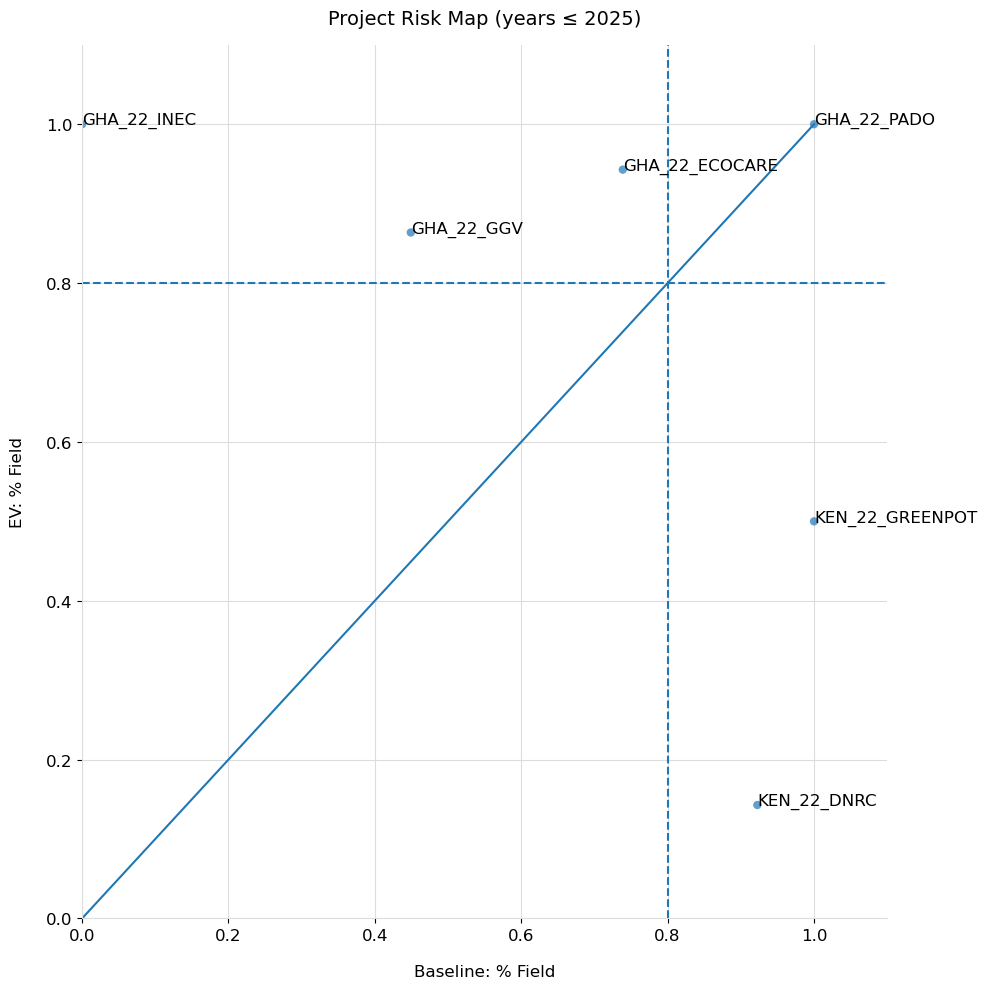

In [18]:
b.plot_risk_map(c1_field, (10,10));

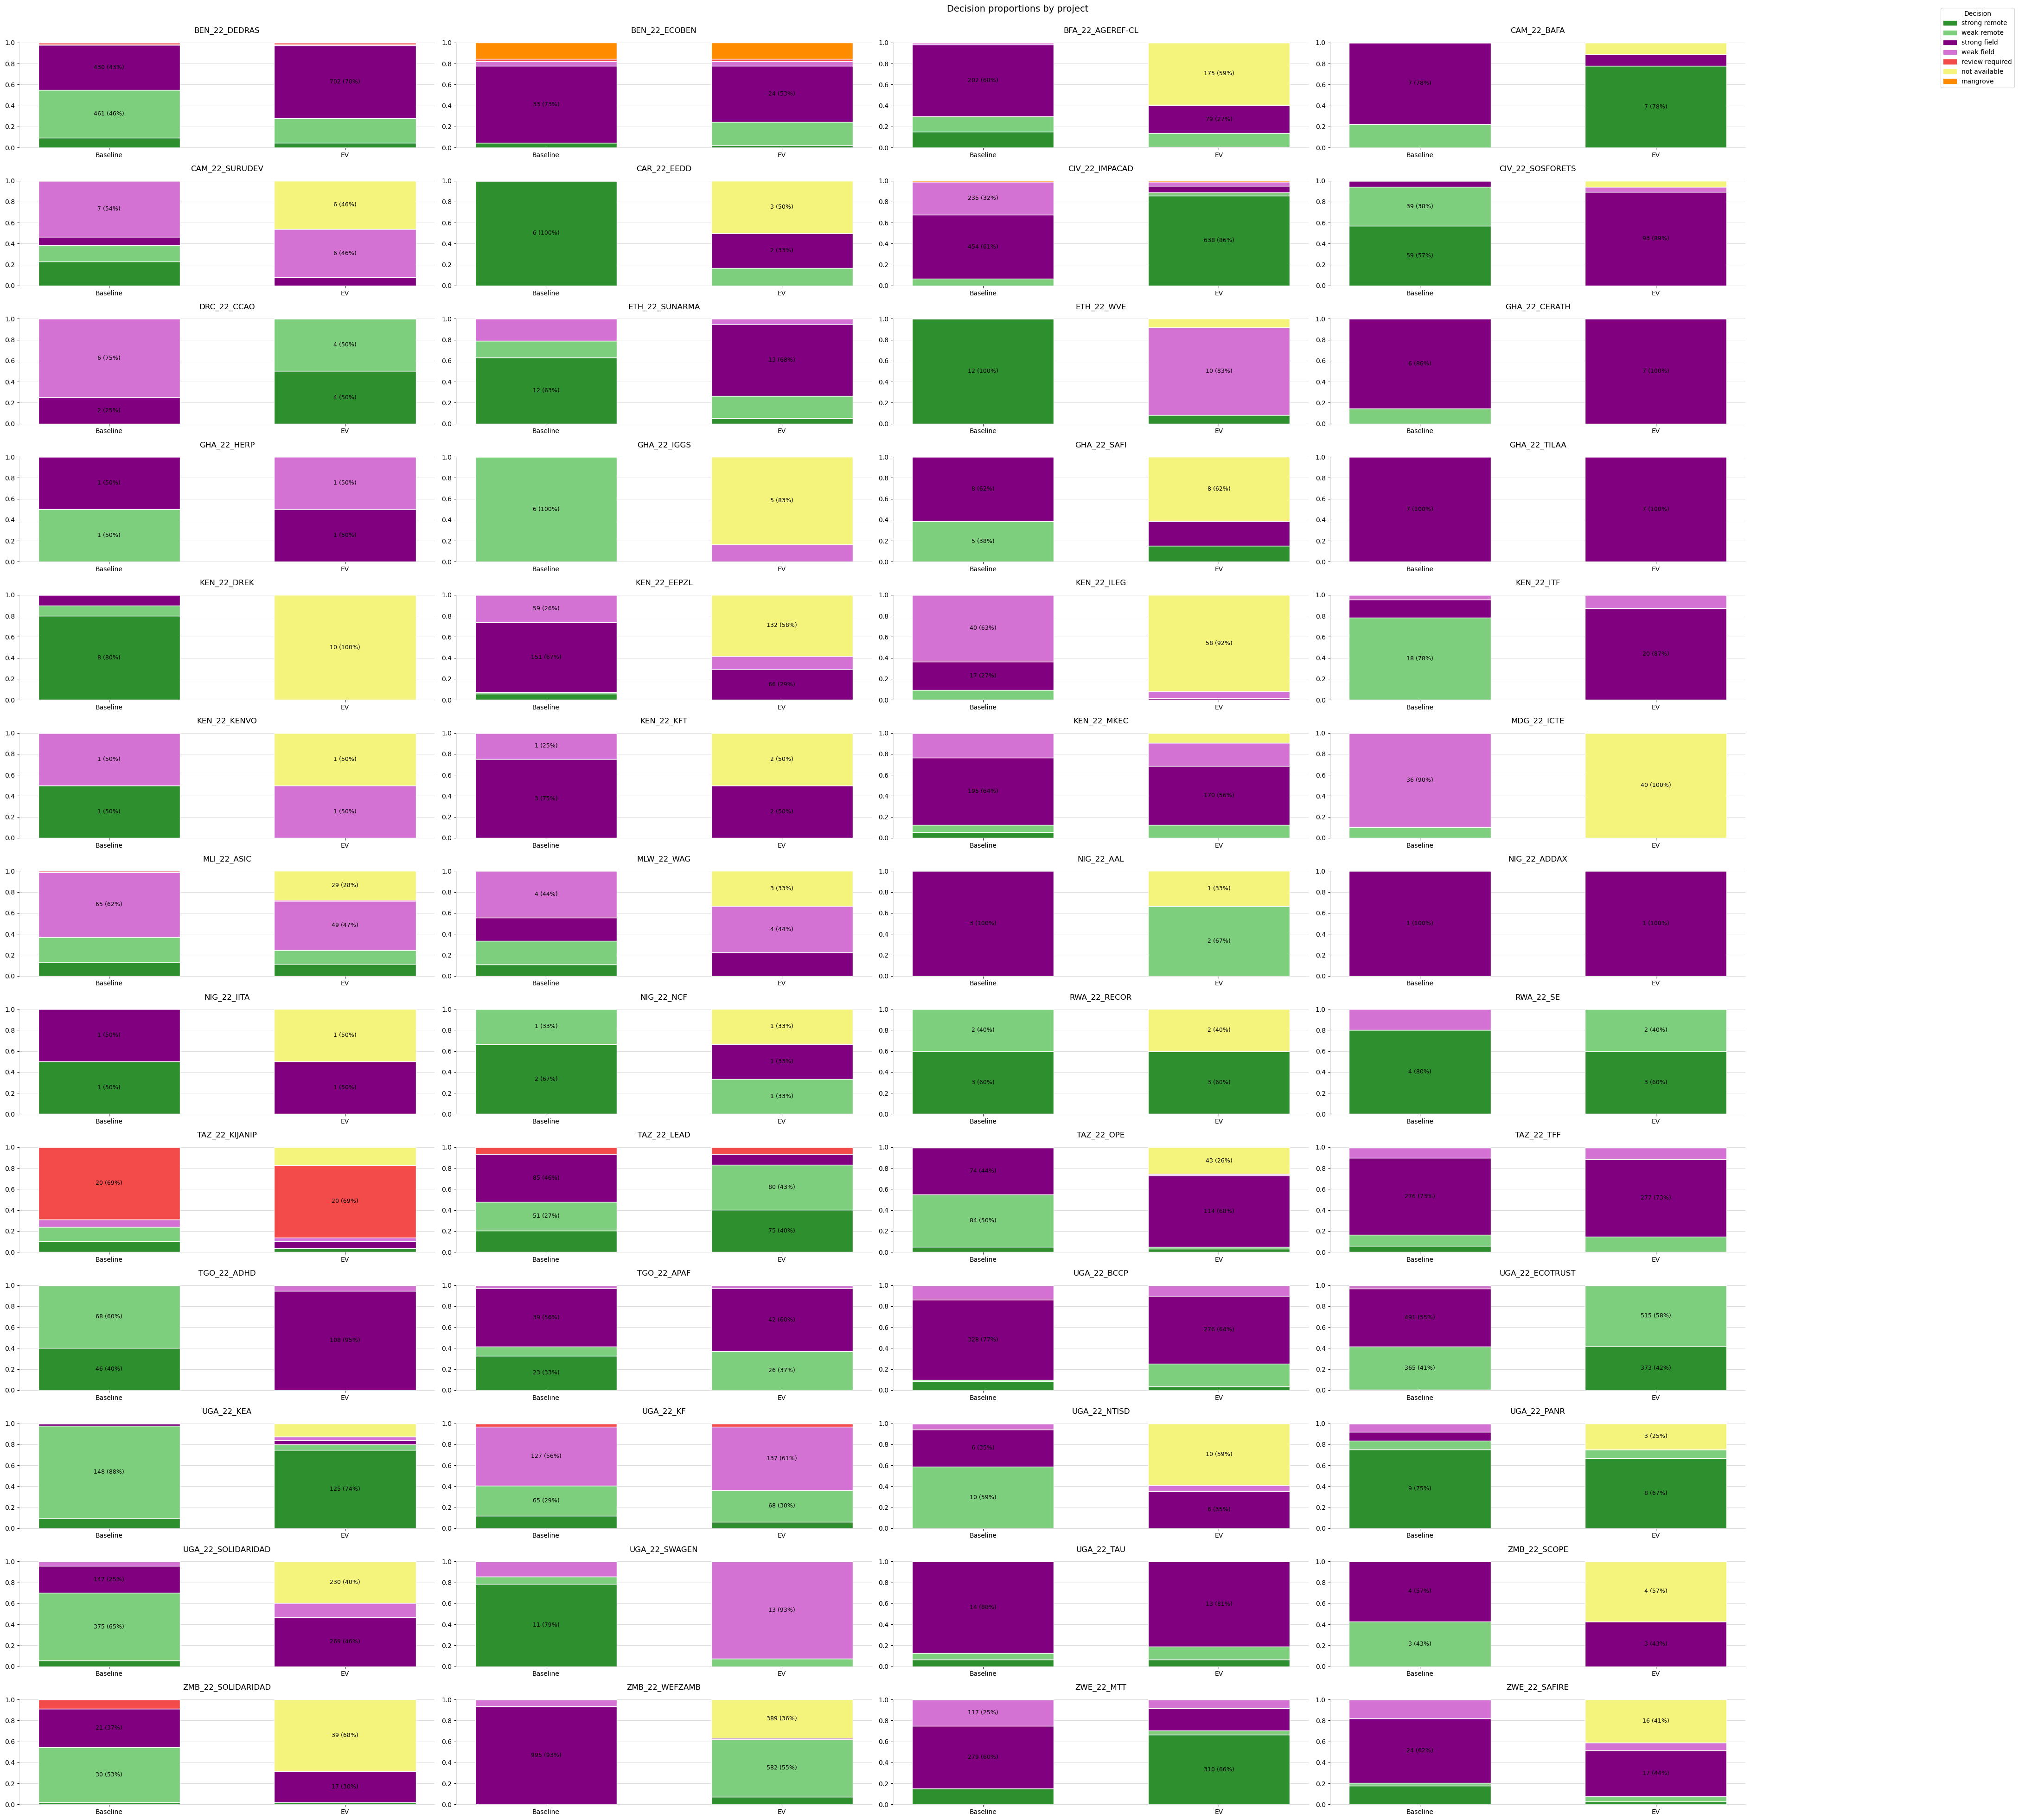

In [48]:
vis.plot_decision_proportions_faceted(c1_remaining, 
                                      ncols=4, 
                                      figsize=(44, 40), 
                                      title="Decision proportions by project", 
                                      annotate=True,   # set True to show labels
                                      label_min_prop=0.25)

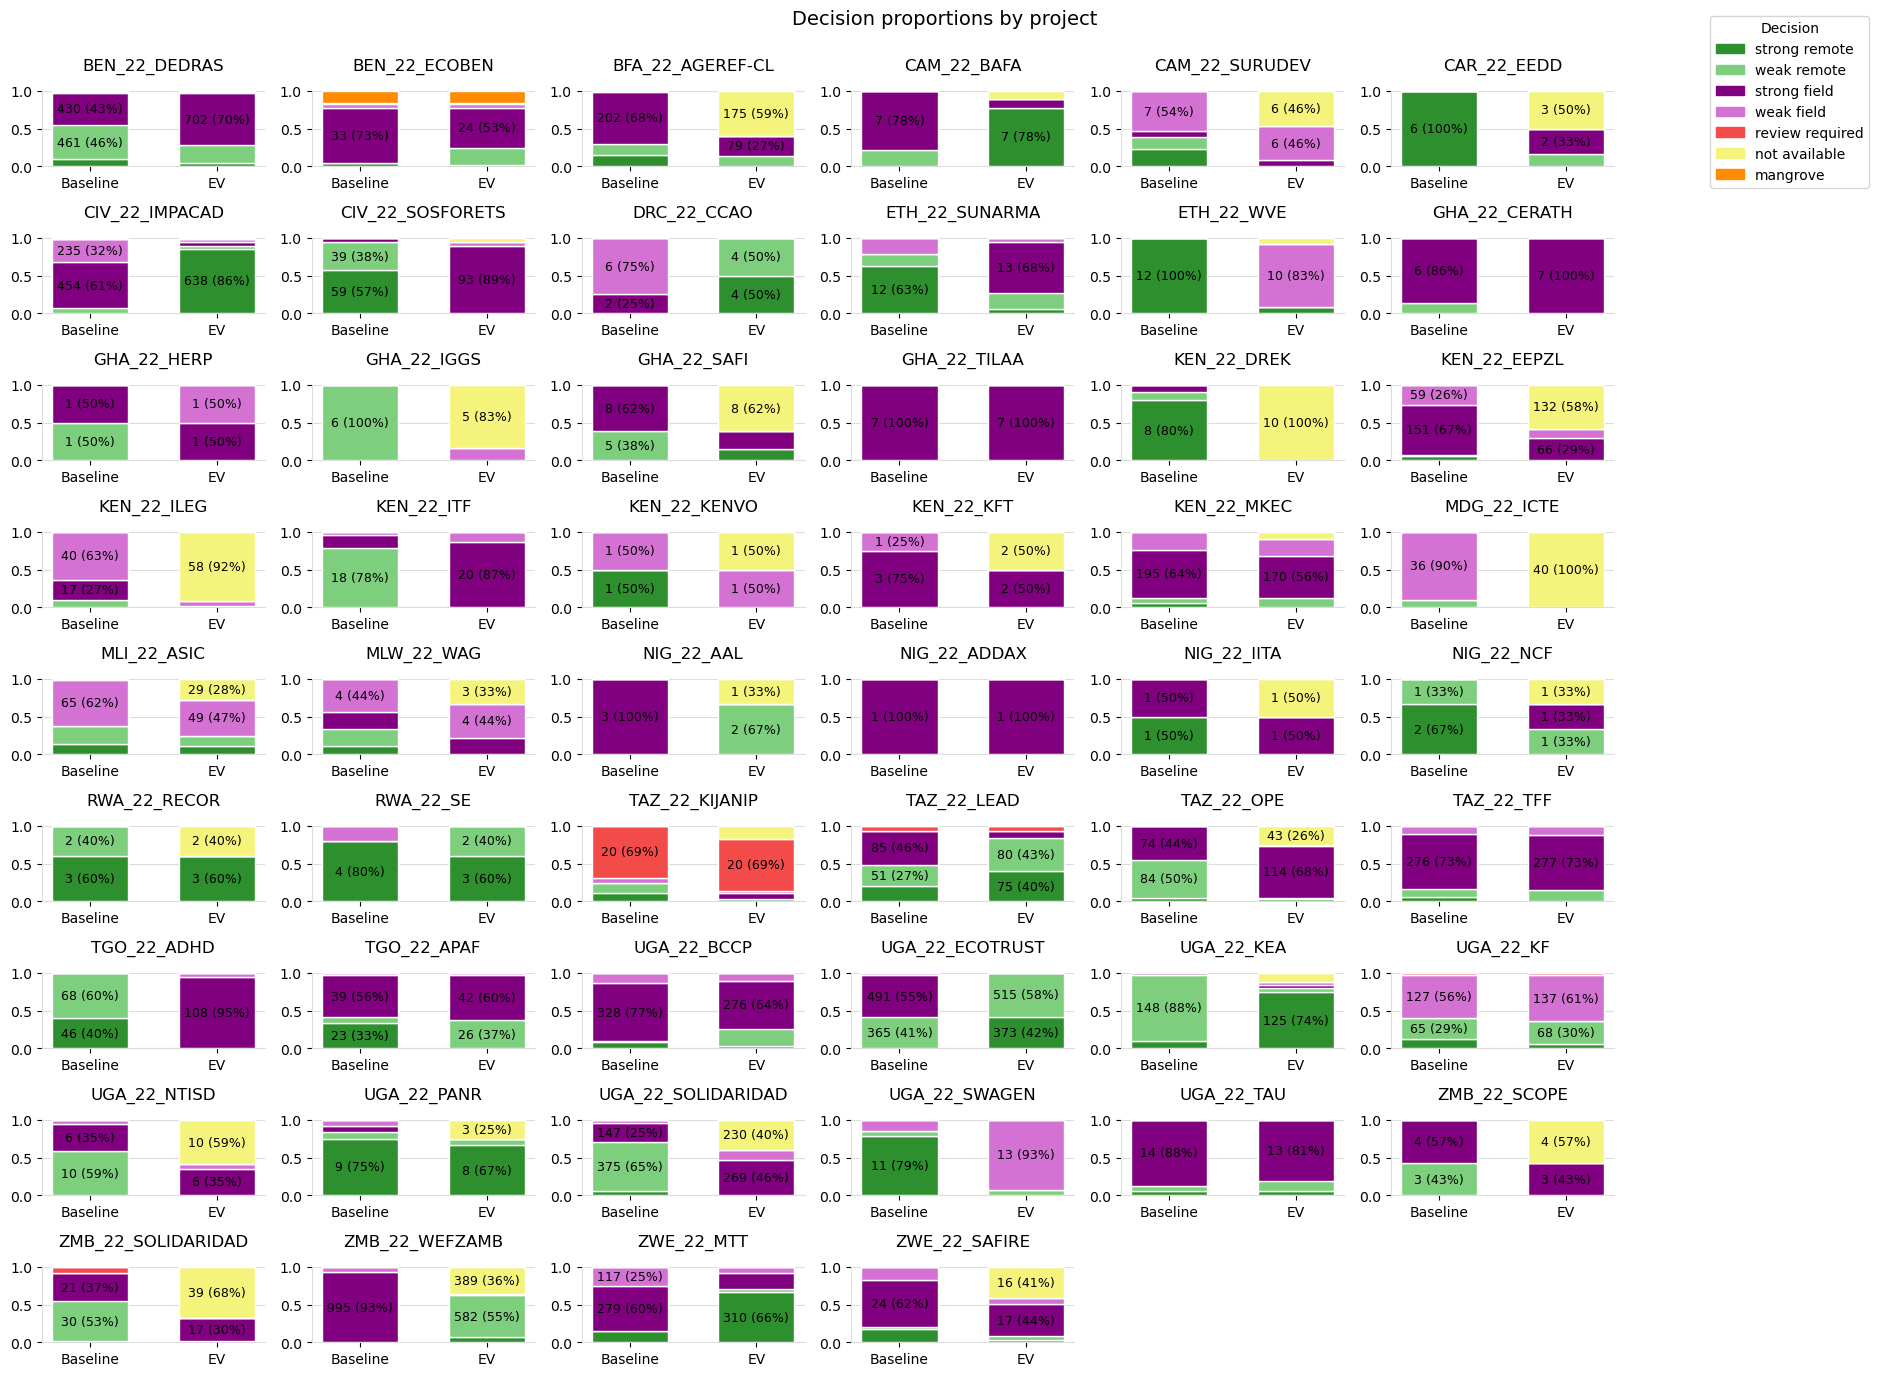

In [45]:
# balanced
vis.plot_decision_proportions_faceted(c1_remaining, ncols=6, figsize=(19, 14), title="Decision proportions by project",
    annotate=True
)

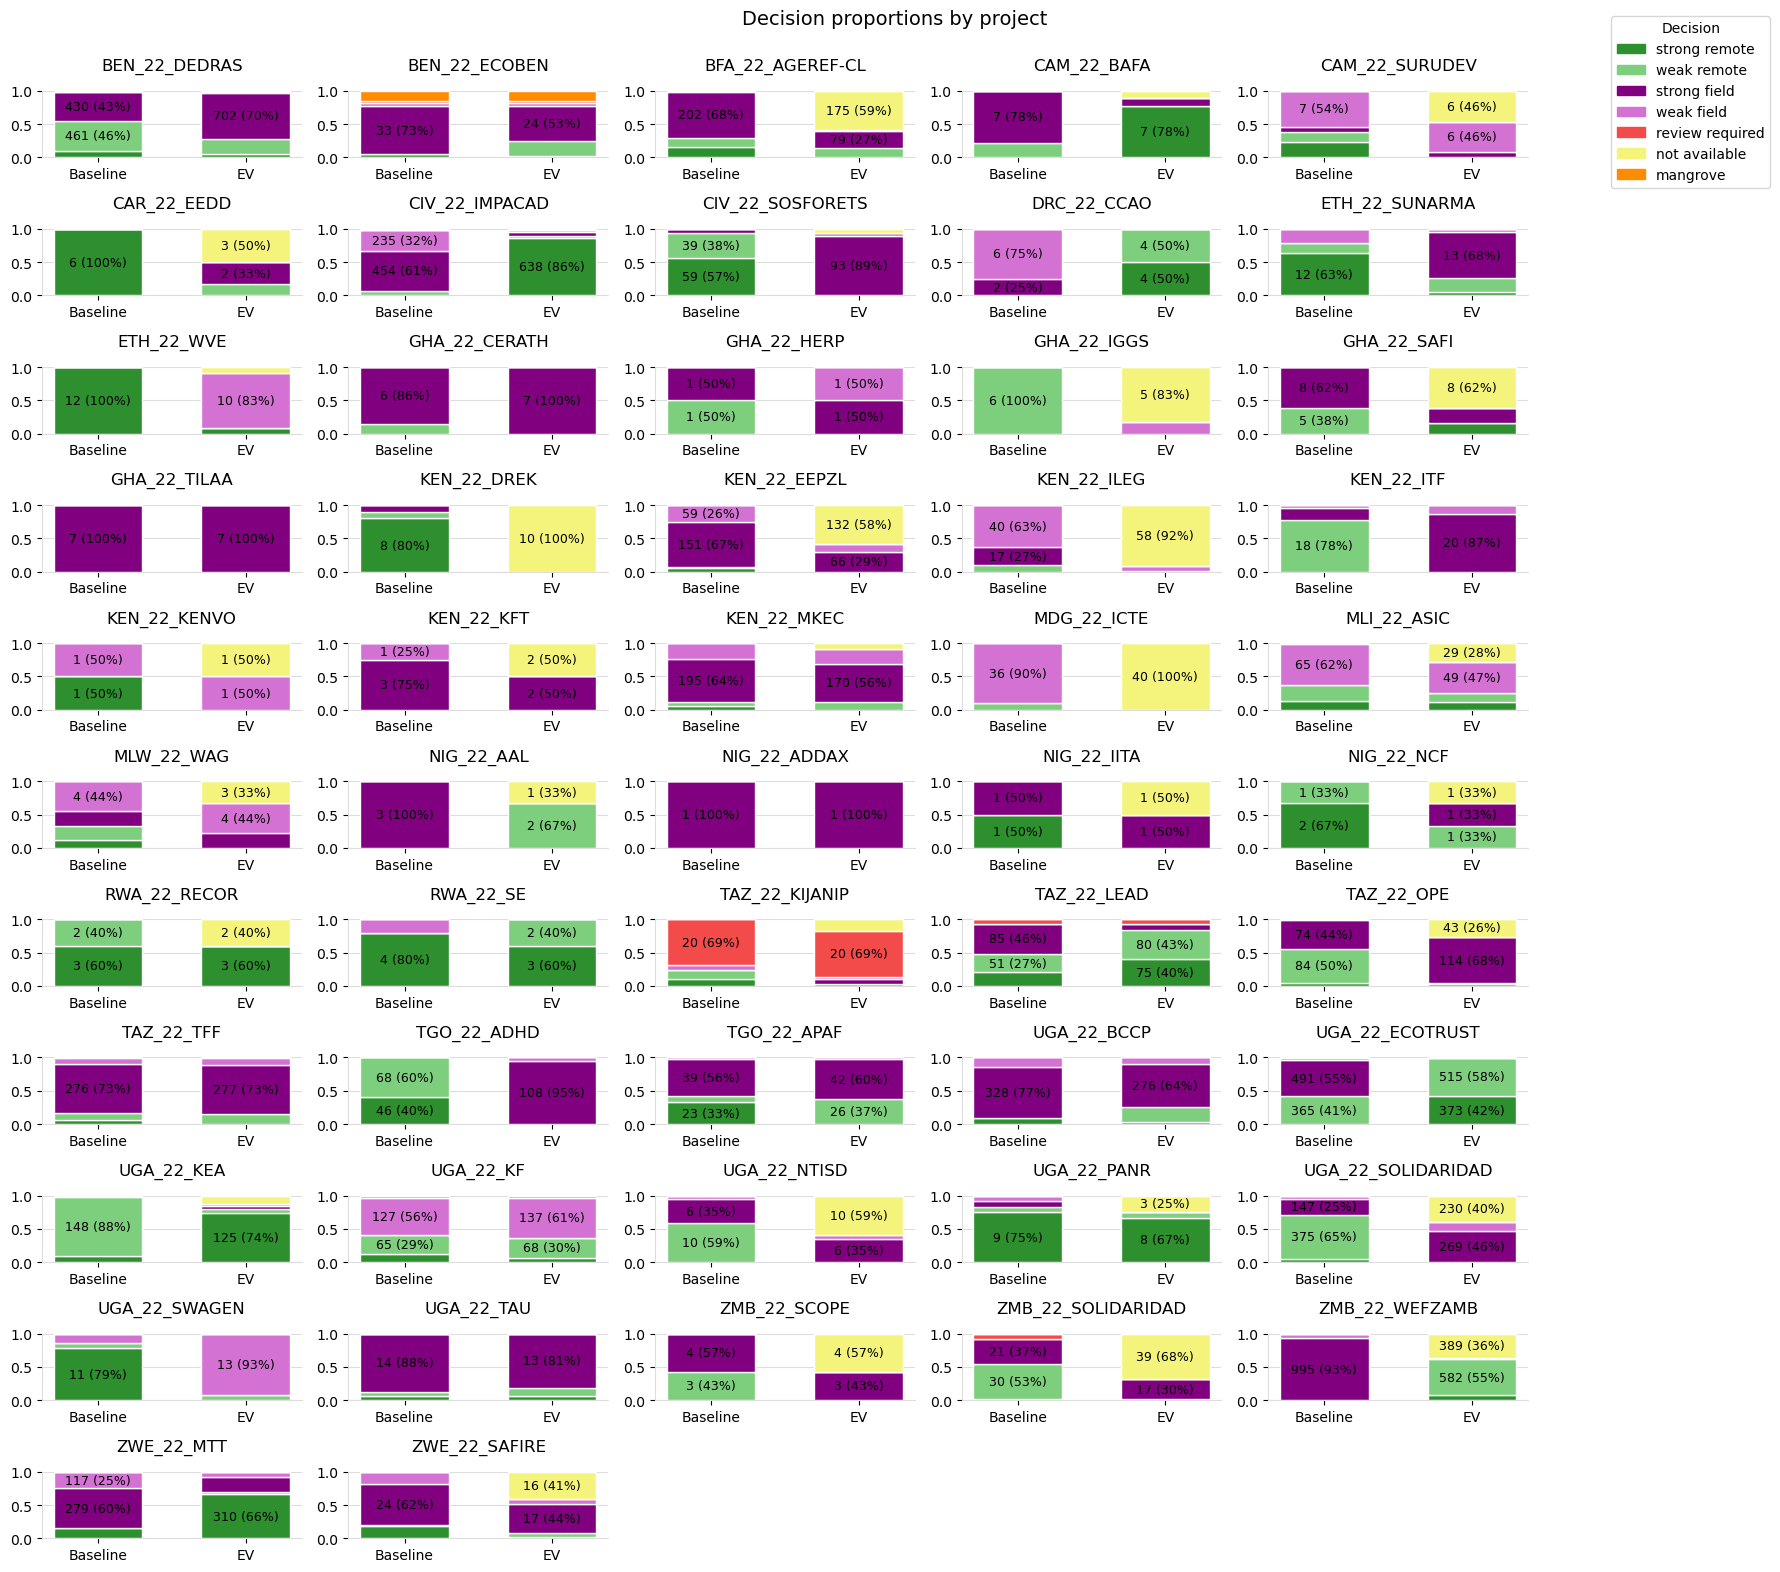

In [46]:
# roomier
vis.plot_decision_proportions_faceted(
    c1_remaining, ncols=5, figsize=(18, 16), title="Decision proportions by project",
    annotate=True
)